# Multiple Linear Regression Project


Problem Statement: Predict the price of the house per unit area based on different parameters like house age, distance of nearest metro station from the house, number of convenience stores available near the house, location of the house. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='datasets_88705_204267_Real estate.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

house_data= pd.read_csv(body)
house_data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
house_data.shape

(414, 8)

In [7]:
house_data.rename(columns={'X1 transaction date':'transaction_date','X2 house age':'house_age','X3 distance to the nearest MRT station':'nearest_MRT_distance','X4 number of convenience stores':'convenience_stores','X5 latitude':'latitude','X6 longitude':'longitude','Y house price of unit area':'house_price_per_unit_area'}, inplace=True)


In [8]:
house_data.head()

,No,transaction_date,house_age,nearest_MRT_distance,convenience_stores,latitude,longitude,house_price_per_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
house_data.dropna(axis=0, inplace=True)

In [10]:
house_data.shape

(414, 8)

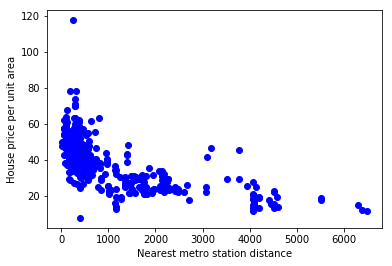

In [13]:
plt.scatter(house_data.nearest_MRT_distance, house_data.house_price_per_unit_area,  color='blue')
plt.xlabel("Nearest metro station distance")
plt.ylabel("House price per unit area")
plt.show()

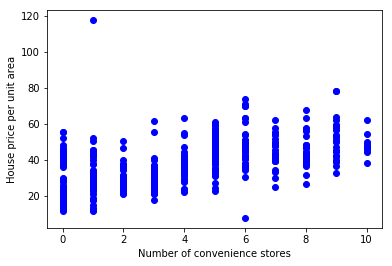

In [14]:
plt.scatter(house_data.convenience_stores, house_data.house_price_per_unit_area,  color='blue')
plt.xlabel("Number of convenience stores")
plt.ylabel("House price per unit area")
plt.show()

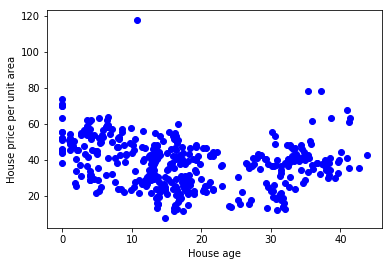

In [15]:
plt.scatter(house_data.house_age, house_data.house_price_per_unit_area,  color='blue')
plt.xlabel("House age")
plt.ylabel("House price per unit area")
plt.show()

**Divide the data into train and test data**

In [16]:
msk = np.random.rand(len(house_data)) < 0.8
train = house_data[msk]
test = house_data[~msk]

**Mutiple Linear Regression Model**

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['house_age','nearest_MRT_distance','convenience_stores','latitude','longitude']])
y = np.asanyarray(train[['house_price_per_unit_area']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-2.97688090e-01 -4.15178265e-03  1.05530903e+00  2.34321892e+02
  -1.54961506e+01]]


Prediction

In [18]:
y_hat= regr.predict(test[['house_age','nearest_MRT_distance','convenience_stores','latitude','longitude']])
x = np.asanyarray(test[['house_age','nearest_MRT_distance','convenience_stores','latitude','longitude']])
y = np.asanyarray(test[['house_price_per_unit_area']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 86.72
Variance score: 0.59


In [20]:
y_hat[0:6]

array([[47.82683685],
       [33.79548341],
       [44.4774322 ],
       [33.16958826],
       [32.9049112 ],
       [29.23898125]])

In [21]:
y[0:6]

array([[42.2],
       [32.1],
       [46.7],
       [22.1],
       [41.4],
       [23.8]])

Result: Multiple Linear Regression model is not the appropriate model for this problem. The accuracy is only 59%. 